Data collection


installing  yfinance for data to do analysis

In [ ]:
pip install yfinance

importing yfinance

In [ ]:
import yfinance as yf

In [ ]:
btc = yf.download('BTC-USD', start='2020-01-01', end='2025-05-20')
btc.to_csv('bitcoin_data.csv')

[*********************100%***********************]  1 of 1 completed


Data preprocessing(cleaning data)

In [ ]:
import pandas as pd
df = pd.read_csv('bitcoin_data.csv',skiprows=3, header=None)
df.columns = ['Date', 'Price', 'Close', 'High', 'Low', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)




In [ ]:
print(df.head(10))
print(df.columns)

                  Price        Close         High          Low       Volume
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
2020-01-06  7769.219238  7781.867188  7409.292969  7410.452148  23276261598
2020-01-07  8163.692383  8178.215820  7768.227539  7768.682129  28767291327
2020-01-08  8079.862793  8396.738281  7956.774414  8161.935547  31672559265
2020-01-09  7879.071289  8082.295898  7842.403809  8082.295898  24045990466
2020-01-10  8166.554199  8166.554199  7726.774902  7878.307617  28714583844
Index(['Price', 'Close', 'High', 'Low', 'Volume'], dtype='object')


In [ ]:
df.head(15)

,Price,Close,High,Low,Volume
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
2020-01-06,7769.219238,7781.867188,7409.292969,7410.452148,23276261598
2020-01-07,8163.692383,8178.215820,7768.227539,7768.682129,28767291327
2020-01-08,8079.862793,8396.738281,7956.774414,8161.935547,31672559265
2020-01-09,7879.071289,8082.295898,7842.403809,8082.295898,24045990466


In [ ]:
print(df.isnull().sum())

Price     0
Close     0
High      0
Low       0
Volume    0
dtype: int64


In [ ]:
df.dropna(inplace=True)

exploratory data analysis and trend analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

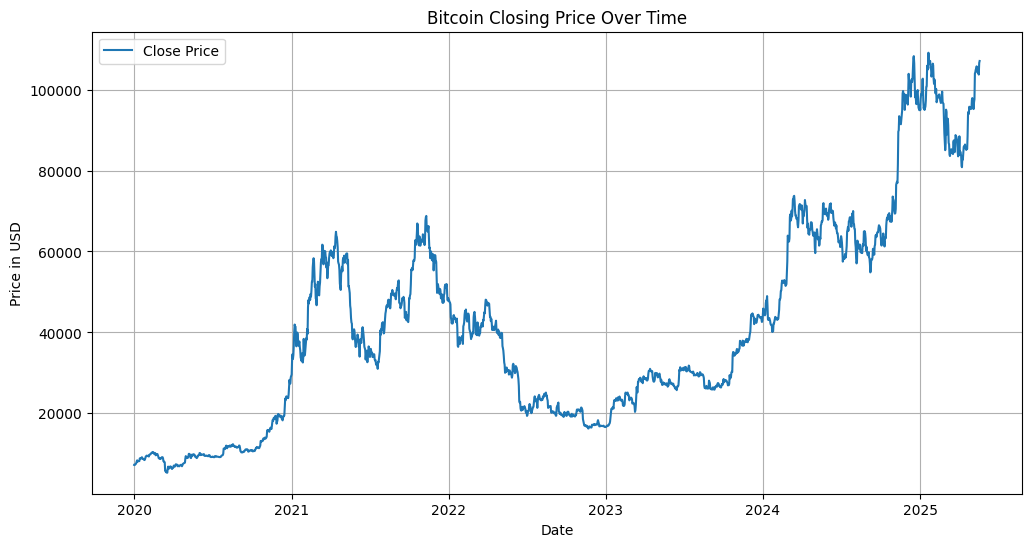

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

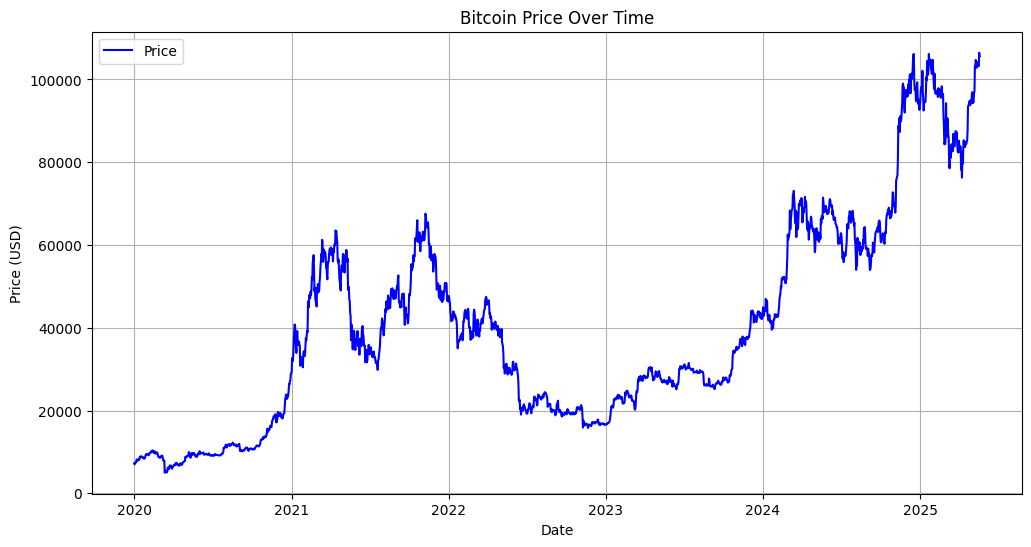

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Price'], label='Price', color='blue')  # Use df.index
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


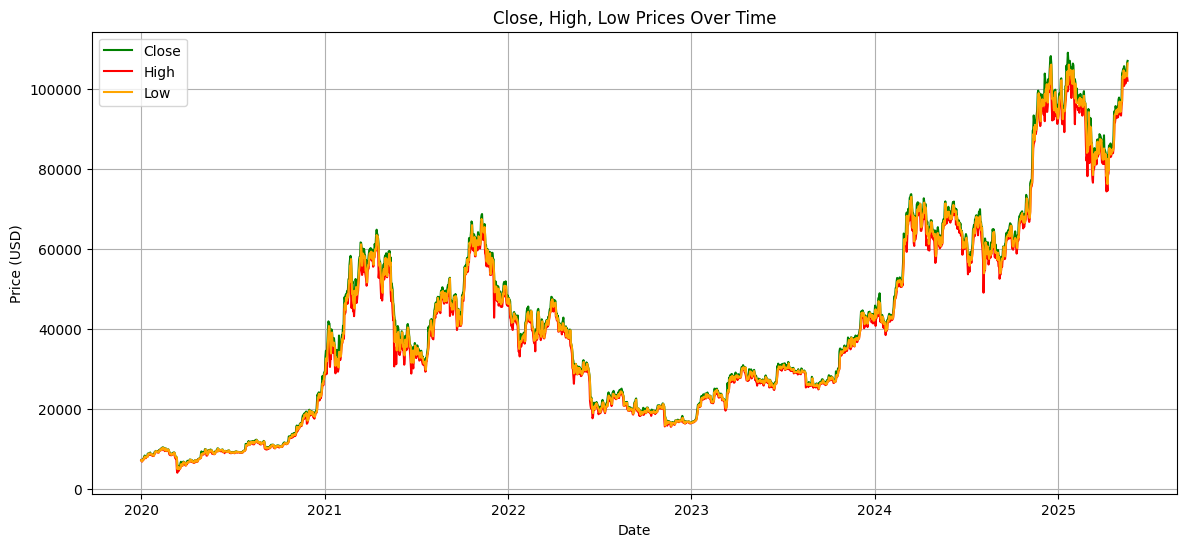

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close', color='green')
plt.plot(df.index, df['High'], label='High', color='red')
plt.plot(df.index, df['Low'], label='Low', color='orange')
plt.title('Close, High, Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


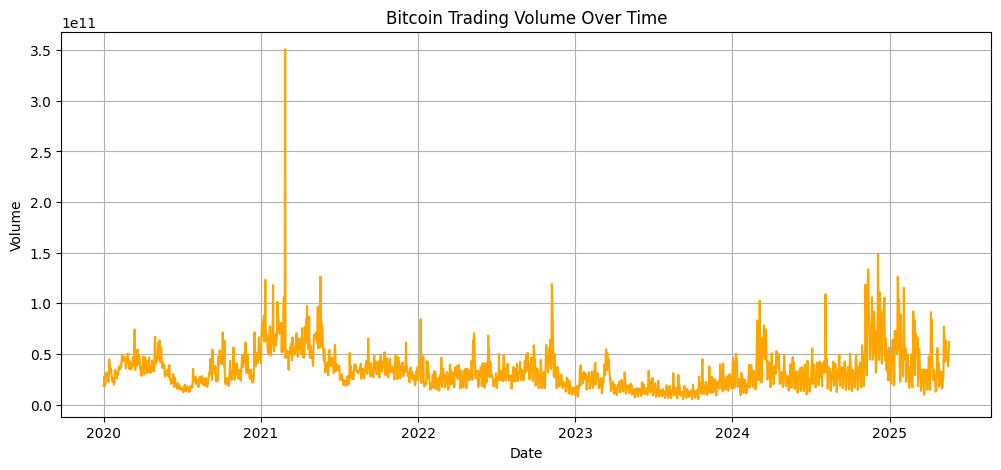

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Volume'], color='orange')  # Use df.index for date
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


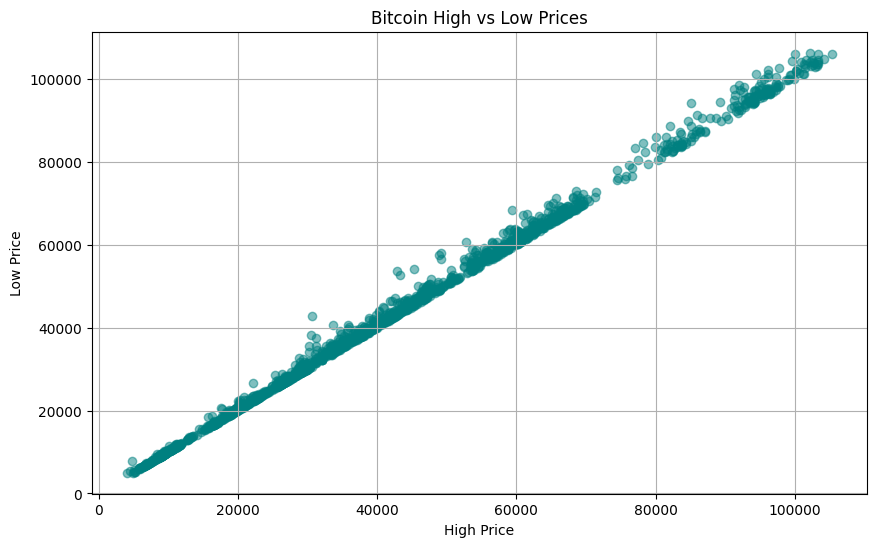

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['High'], df['Low'], alpha=0.5, color='teal')
plt.title('Bitcoin High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()

forecasting using arima(AutoRegressive Integrated Moving Average)
AR :past values to predict the current value
I: subtracting today’s value from yesterday’s
MA: Uses past errors (difference between actual and predicted values)
ARIMA(p, d, q)
number of AR terms (lags of past values)
number of times data is differenced to make it stationary
number of MA terms (lags of forecast errors)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller



ADF Test (Augmented Dickey-Fuller Test)
The ADF test checks whether a time series is stationary or non-stationary

In [ ]:
result = adfuller(df['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Series is non-stationary. ARIMA will difference it.")
else:
    print("Series is stationary. ARIMA is ready.")


ADF Statistic: -0.2592269056623962
p-value: 0.9310837979190095
Series is non-stationary. ARIMA will difference it.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


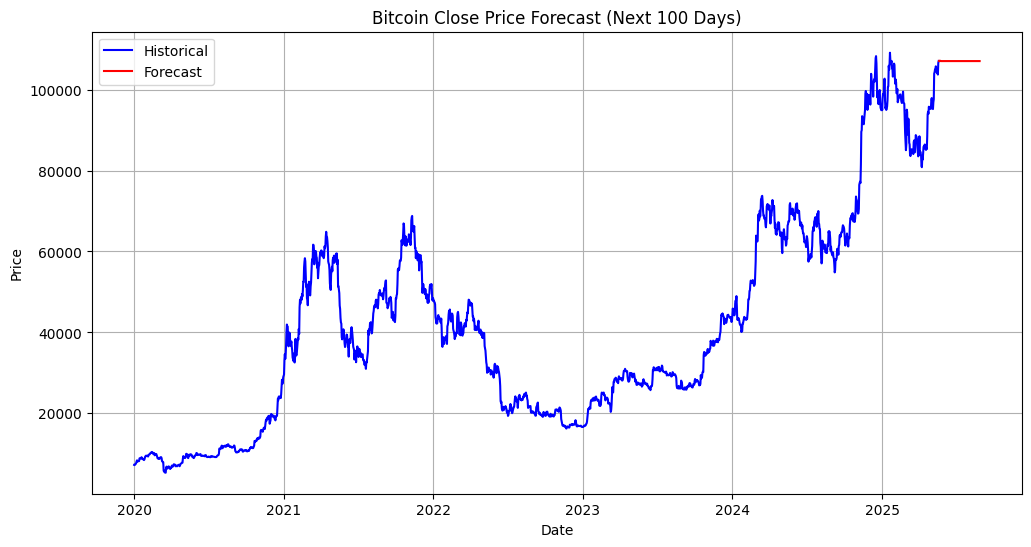

In [ ]:
model = ARIMA(df['Close'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=100)
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=100)
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Historical', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Bitcoin Close Price Forecast (Next 100 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast_Close': forecast})
forecast_df.to_csv('bitcoin_close_forecast.csv', index=False)